## Background##
To see relations between the rate of inflation and the unemployment rate you need to build the Phillips curve. Phillips curve represents the average correlation between unemployment and wage behavior. It shows the rate of wage inflation that would result if a particular level of unemployment persisted for some time. In simple terms, when unemployment is high, wages increase slowly; when unemployment is low, wages rise rapidly. 

 If business is booming, employers will be seeking for workers and offering them bigger wages.That means that demand for labor is increasing at a fast pace (i.e., percentage unemployment is decreasing rapidly), than they would if the demand for labor were either not increasing (e.g., percentage unemployment is unchanging) or only increasing at a slow pace. Also a lower rate of unemployment is associated with higher wage rate or inflation, and vice versa. When wage increases, the firms cost of production increases which leads to increase in price. Therefore it is also called wage inflation, that is, decrease in unemployment leads to wage inflation. 
 
 To build the Phillips curve you need two indicators: CPI change and percantage of unemployment. The CPI measures the average change in prices over time that consumers pay for a basket of goods and services, commonly known as inflation.The weighted average of the prices of goods and services that approximates an individual's consumption patterns is used to calculate CPI.
 


## Datasets
Let's start by importing some necessary modules and libraries. There are pandas_datareader for datasets, datatime from datatime to manipulating dates and seaborn library for data vizualization. 


In [58]:
import pandas_datareader as web
from datetime import datetime
import seaborn as sns

Now you have prepare datasets to work with them. Here are two links to datasets with which you will work. First is **cpi_url**, wich includes data for calculation CPI change. And the second link called **urate_url**  contains info abount unemployment.

In [59]:
cpi_url = (
   'dataset=PRC_HICP_MIDX&to=2019-08-01&from=1996-01-01&COICOP=[CP00]'
   '&GEO=[AT,BE,BG,HR,CY,CZ,DK,EE,EA18,EA19,EA,EEA,EU28,EU,EU27_2019,'
   'FI,MK,FR,DE,EL,HU,IS,IE,IT,LV,LT,LU,MT,NL,NO,PL,PT,RO,RS,SK,SI,ES'
   ',SE,CH,TR,UK,US]&UNIT=[I15]&h=TIME&v=Geopolitical%20entity%20(reporting)')
urate_url = (
   'dataset=UNE_RT_M&to=2019-08-01&from=1983-01-01&AGE=[TOTAL]&S_ADJ=[SA]'
    '&SEX=[T]&UNIT=[PC_ACT]&h=TIME&v=Geopolitical%20entity%20(reporting)')

Select time period from the dataset, which data will be used for the scatter plot of correlation. For example, **2019-06-01**:

In [60]:
T = datetime(2019, 6, 1)

Export data from Econdb to **cpi** dataframe using **DataReader** by passing appropriate source (in this case **cpi_url**).To get values from multiindex use the method **get_level_values()** and pass level you need.

In [61]:
cpi = web.DataReader(cpi_url, 'econdb')
cpi.columns = cpi.columns.get_level_values(3)

To track dependence on the plot you should use 12 month period. So, calculate the pecantage change of CPI from dataframe with 12 period. Then reshape your dataset to two columns table with CPI change for 2019-06-01 in each country.

In [62]:
cpi = cpi.pct_change(12)
cpi = cpi.loc[T].to_frame(name='CPI')

To get data about unemployment export dataset by link **urate_url** in **DataReader**, use again **get_level_values()** method to get 5th level and convert your dataframe to table with unemployment rate data in each country. 

In [63]:
urate = web.DataReader(urate_url, 'econdb')
urate.columns = urate.columns.get_level_values(5)
urate = urate.loc[T].to_frame(name='URATE')

Concatenate dataframes with unemployment rate and  CPI change by **join()** method. To exclude european country groups (areas and unions) skip values of index that contains 'Euro' using **lambda** and **map()**.  

In [64]:
cs = cpi.join(urate)
cs = cs.iloc[cs.index.map(lambda x: not x.startswith(('Euro', 'Turkey')))]

## Scatter plot

You have the dataframe with all data you need for plot. And now you can use **seaborn** and visualizate relations between the rate of inflation (CPI) and the unemployment rate.

Just call the **seaborn** method **regplot()** and pass them data for x and y axes. This function draw a scatterplot of two variables, x(URATE) and y(CPI), and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression. 

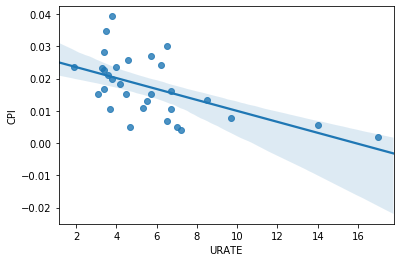

In [65]:
sns.regplot(cs.URATE, cs.CPI)

So, here is a Philips curve that demonstrate how change unemployment rate with changing a CPI. As you move up or down the blue line, either inflation or unemployment will increase and the other decrease.